#### Questions
1. Which have been the top 5 most successful Olympics for Team GB?
2. Which events have team GB been the most successful in, how has this changed over time?
3. How well have women been represented in Team GB vs other countries?

In [433]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [434]:
#Load data
events = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

#load event_type data - manual input
event_typ = pd.read_csv("events.csv")

In [435]:
#view data
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [195]:
#check nulls and data types
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [465]:
events.describe()

,ID,Age,Height,Weight,event_rank,Medal_Bronze,Medal_Gold,Medal_Silver,athlete_rank,Sex_F,Sex_M
count,269383.000000,260652.000000,210688.000000,208036.000000,269383.000000,269383.000000,269383.000000,269383.000000,269383.000000,269383.000000,269383.000000
mean,68233.209089,25.550941,175.335472,70.697254,33027.874836,0.048815,0.049057,0.048110,1.614705,0.276599,0.723401
std,39023.499143,6.386385,10.521335,14.349271,62901.297562,0.215482,0.215987,0.213999,1.306051,0.447317,0.447317
min,1.000000,10.000000,127.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,34639.500000,21.000000,168.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,68177.000000,24.000000,175.000000,70.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,102086.500000,28.000000,183.000000,79.000000,30206.500000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
max,135571.000000,97.000000,226.000000,214.000000,230056.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000


#### Data Manipulation

In [436]:
#create new field to concat host city and year of Olympics e.g. London 2012
events['City_Year'] = events['City']+' '+(events['Year'].astype(str))

In [437]:
#reformat year to date time
events['Year']=pd.to_datetime(events['Year'].astype(str), format='%Y')

In [438]:
#replace '-1' and '-2' variants of some team names
events['Team'] = events['Team'].str.replace('-1','')
events['Team'] = events['Team'].str.replace('-2','')

In [439]:
#drop Athens 1906 Intercalated event - not recognised as an official Olympic Games by the IOC
events = events[(events.Year != '1906-01-01')]

In [440]:
events.shape

(269383, 16)

#### Single vs Team Events

In [441]:
#add event type to events dataset
events = pd.merge(events,event_typ,on=['Event','Event'])

In [442]:
#rank to account for team events
events['event_rank'] = events.sort_values(['Name'], \
             ascending=[True])\
             .groupby(['NOC', 'Medal', 'Event','City_Year'])\
             .cumcount() + 1

In [443]:
#single events re-encode all to one as multiple single competitors can be in same event
events.loc[events['Type'] == 'Single', 'event_rank'] = 1

In [444]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,City_Year,Type,event_rank
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Barcelona 1992,Team,19
1,124,Youssef Mohamed Abbas,M,31.0,NaN,NaN,Egypt,EGY,1952 Summer,1952-01-01,Summer,Helsinki,Basketball,Basketball Men's Basketball,NaN,Helsinki 1952,Team,224581
2,136,Alessandro Abbio,M,29.0,195.0,85.0,Italy,ITA,2000 Summer,2000-01-01,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,Sydney 2000,Team,6761
3,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,189.0,85.0,Egypt,EGY,1972 Summer,1972-01-01,Summer,Munich,Basketball,Basketball Men's Basketball,NaN,Munich 1972,Team,2751
4,199,Amir Abdel Meguid,M,23.0,178.0,67.0,Egypt,EGY,1984 Summer,1984-01-01,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN,Los Angeles 1984,Team,10478


#### OneHot Encode Variables

In [445]:
# Re-encode medal column.
events=pd.get_dummies(data=events,columns=['Medal'])

In [446]:
#check to make sure it looks right
events.loc[(events['Sport']=="Canoeing") & 
           (events['NOC'] == 'GBR') & 
           (events['Year'] == '2012-01-01') & 
           (events['Medal_Gold'] == 1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,City_Year,Type,event_rank,Medal_Bronze,Medal_Gold,Medal_Silver
229447,6922,"Timothy ""Tim"" Baillie",M,33.0,176.0,78.0,Great Britain,GBR,2012 Summer,2012-01-01,Summer,London,Canoeing,"Canoeing Men's Canadian Doubles, Slalom",London 2012,Team,2,0,1,0
229636,115534,Etienne Stott,M,33.0,182.0,83.0,Great Britain,GBR,2012 Summer,2012-01-01,Summer,London,Canoeing,"Canoeing Men's Canadian Doubles, Slalom",London 2012,Team,1,0,1,0
266347,77674,"Edward Daniel ""Ed"" McKeever",M,28.0,173.0,79.0,Great Britain,GBR,2012 Summer,2012-01-01,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, 200 metres",London 2012,Single,1,0,1,0


#### Data is a snapshot at the time of each Olympics and since then there have been some changes...
Ivan Sergeyevich Ukhov - disqualified
<br>Sergey Aleksandrovich Kirdyapkin - stripped of medal in 2016
<br>Tatyana Viktorovna Lysenko - stripped of medal
<br>Mariya Sergeyevna Savinova - stripped of medal
<br>Yuliya Mikhaylovna Zaripova - stripped of medal

#### Summarise Results by Team

In [447]:
#summarise medal count by games, team and event
team_table = events[['City_Year','Year','NOC','Sport', 'Event','Medal_Bronze', 'Medal_Silver', 'Medal_Gold'
                    ]].loc[(events['Season']=="Summer") & (events['event_rank'] == 1)]

In [448]:
team_table.head()

,City_Year,Year,NOC,Sport,Event,Medal_Bronze,Medal_Silver,Medal_Gold
16,Rio de Janeiro 2016,2016-01-01,ESP,Basketball,Basketball Men's Basketball,1,0,0
81,Roma 1960,1960-01-01,BRA,Basketball,Basketball Men's Basketball,1,0,0
82,Tokyo 1964,1964-01-01,BRA,Basketball,Basketball Men's Basketball,1,0,0
116,Rio de Janeiro 2016,2016-01-01,USA,Basketball,Basketball Men's Basketball,0,0,1
195,Barcelona 1992,1992-01-01,USA,Basketball,Basketball Men's Basketball,0,0,1


In [450]:
#view gold medal count by sport (team GB in London 1908)
team_table[(team_table['City_Year']=='London 1908')&
          (team_table['NOC']=='GBR')
          ].groupby(['Sport'])['Medal_Gold'].sum().sort_values(ascending=False)

Sport
Sailing           18
Athletics          7
Motorboating       6
Tennis             6
Shooting           6
Boxing             5
Cycling            5
Swimming           4
Rowing             4
Wrestling          3
Archery            2
Racquets           2
Polo               1
Water Polo         1
Hockey             1
Football           1
Figure Skating     1
Tug-Of-War         1
Jeu De Paume       0
Gymnastics         0
Fencing            0
Diving             0
Rugby              0
Lacrosse           0
Name: Medal_Gold, dtype: uint8

In [17]:
#view medal count by team
team_table[(team_table['City_Year']=='Rio de Janeiro 2016')
          ].groupby(['NOC'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'
                            ].sum().sort_values(by='Medal_Gold', ascending=False)

<ipython-input-17-5f899142b457>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_table[(team_table['City_Year']=='Rio de Janeiro 2016')


,Medal_Gold,Medal_Silver,Medal_Bronze
NOC,,,
USA,46,37,38
GBR,27,23,17
CHN,26,18,26
RUS,23,17,20
GER,17,10,16
...,...,...,...
IND,0,1,1
IRL,0,2,0
IRQ,0,0,0


In [18]:
#summarise medal count by country and add total medal count
medal_table = team_table.groupby(['City_Year','Year', 'NOC'
                                 ])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'
                                   ].sum().sort_values(by='Medal_Gold', ascending=False)

medal_table['Medal_Total'] = medal_table.loc[:,['Medal_Gold','Medal_Silver','Medal_Bronze']].sum(axis=1)
medal_table.reset_index(inplace=True)

medal_table[(medal_table['City_Year']=='Rio de Janeiro 2016')].sort_values(by="Medal_Total", ascending=False)

<ipython-input-18-a6748b487220>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medal_table = team_table.groupby(['City_Year','Year', 'NOC'


,City_Year,Year,NOC,Medal_Gold,Medal_Silver,Medal_Bronze,Medal_Total
11,Rio de Janeiro 2016,2016-01-01,USA,46,37,38,121
50,Rio de Janeiro 2016,2016-01-01,CHN,26,18,26,70
48,Rio de Janeiro 2016,2016-01-01,GBR,27,23,17,67
55,Rio de Janeiro 2016,2016-01-01,RUS,23,17,20,60
68,Rio de Janeiro 2016,2016-01-01,GER,17,10,16,43
...,...,...,...,...,...,...,...
1491,Rio de Janeiro 2016,2016-01-01,COD,0,0,0,0
1490,Rio de Janeiro 2016,2016-01-01,COK,0,0,0,0
1489,Rio de Janeiro 2016,2016-01-01,CAF,0,0,0,0
1487,Rio de Janeiro 2016,2016-01-01,GHA,0,0,0,0


In [173]:
#summarise Team GB performance by Olympics
medal_table[(medal_table['NOC']=='GBR')].sort_values(by="Year", ascending=False)

,City_Year,Year,NOC,Medal_Gold,Medal_Silver,Medal_Bronze,Medal_Total
48,Rio de Janeiro 2016,2016-01-01,GBR,27,23,17,67
44,London 2012,2012-01-01,GBR,29,17,19,65
63,Beijing 2008,2008-01-01,GBR,19,13,16,48
143,Athina 2004,2004-01-01,GBR,9,9,14,32
116,Sydney 2000,2000-01-01,GBR,11,11,7,29
652,Atlanta 1996,1996-01-01,GBR,1,8,6,15
276,Barcelona 1992,1992-01-01,GBR,5,3,12,20
277,Seoul 1988,1988-01-01,GBR,5,10,9,24
270,Los Angeles 1984,1984-01-01,GBR,5,11,21,37
275,Moskva 1980,1980-01-01,GBR,5,7,9,21


### Question 1: What are the top 5 Olympics for team GB in terms of gold medals

In [168]:
#summarise Team GB performance by Olympics - sort values by gold medal count
gb = medal_table[(medal_table['NOC']=='GBR')].sort_values(by="Medal_Total", ascending=False).head()

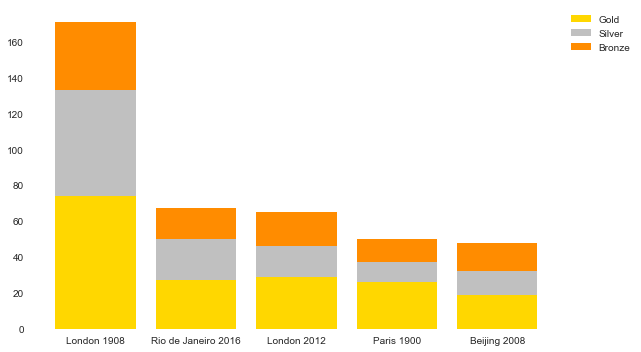

In [188]:
#plot top 5 olympic games for team gb (by medal count)
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [2, 2]
plt.style.use('seaborn')

ax.b1 = plt.bar(gb['City_Year'], gb['Medal_Gold'], color="gold", label="Gold")
ax.b2 = plt.bar(gb['City_Year'], gb['Medal_Silver'], bottom=gb['Medal_Gold'], color="silver",  label="Silver")
ax.b3 = plt.bar(gb['City_Year'], gb['Medal_Bronze'], bottom=gb['Medal_Gold']+gb['Medal_Silver'], color="darkorange",  label="Bronze")

ax.set_facecolor("#FFFFFF") 
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

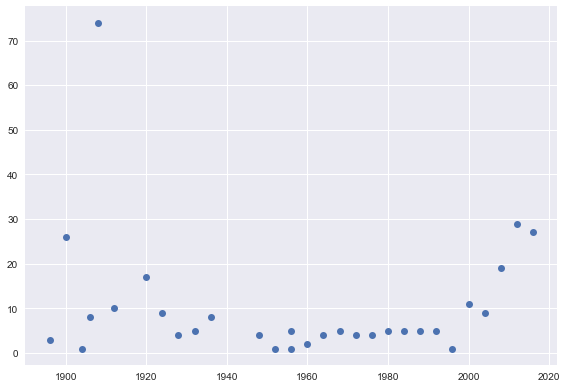

In [25]:
#plot gold medal count
plt.plot_date(medal_table[(medal_table['NOC']=='GBR')]["Year"], medal_table[(medal_table['NOC']=='GBR')]["Medal_Gold"])
plt.tight_layout()

### Question 2: Which events have team GB been the most successful in, how has this changed over time?

In [177]:
#select data for team GB
gbr_team_table = events[['City_Year',
                     'Year',
                     'NOC',
                     'Sport', 
                     'Event',
                     'Medal_Bronze', 
                     'Medal_Silver', 
                     'Medal_Gold']
                   ].loc[(events['Season']=="Summer") & (events['event_rank'] == 1) & (events['NOC'] == 'GBR')]

In [451]:
#medal count by sport
gbr_sport = gbr_team_table.groupby(['Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'
                                                                      ].sum().sort_values(by='Medal_Gold', ascending=True)

gbr_sport['Medal_Total'] = gbr_sport.loc[:,['Medal_Gold','Medal_Silver','Medal_Bronze']].sum(axis=1)

gbr_sport.sort_values(by='Medal_Total', ascending=False).head(10)

<ipython-input-451-77c900f7df32>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gbr_sport = gbr_team_table.groupby(['Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'


,Medal_Gold,Medal_Silver,Medal_Bronze,Medal_Total
Sport,,,,
Athletics,56,80,67,203
Sailing,57,33,14,104
Cycling,32,31,26,89
Swimming,16,28,30,74
Rowing,31,24,13,68
Boxing,18,13,25,56
Tennis,18,15,14,47
Shooting,13,15,18,46
Equestrianism,11,11,13,35


In [181]:
gbr_sport = gbr_team_table.groupby(['Year','Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'
                                                                      ].sum().sort_values(by='Medal_Gold', ascending=True)

gbr_sport['Medal_Total'] = gbr_sport.loc[:,['Medal_Gold','Medal_Silver','Medal_Bronze']].sum(axis=1)

<ipython-input-181-26dc29520113>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gbr_sport = gbr_team_table.groupby(['Year','Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'


In [185]:
gbr_sport.head()

Medal_Gold  Medal_Silver  Medal_Bronze  Medal_Total
Year       Sport                                                          
1896-01-01 Athletics            0             1             1            2
1984-01-01 Judo                 0             1             2            3
           Hockey               0             0             1            1
           Gymnastics           0             0             0            0
           Fencing              0             0             0            0

In [186]:
'''
Function: to get top n highest scoring Olympic events
Inputs: number of sports to compare, dataframe - default gbr_team_table
Outputs index list of top n sports

'''

def top_sports(n, df=gbr_team_table):
    gbr_sport = df.groupby(['Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'
                                     ].sum().sort_values(by='Medal_Gold', ascending=True)
    gbr_sport['Medal_Total'] = gbr_sport.loc[:,['Medal_Gold','Medal_Silver','Medal_Bronze']].sum(axis=1)
    large_n = gbr_sport.nlargest(n, "Medal_Total")
    std_index = large_n.index
    index_list = std_index.tolist()
    return index_list

<ipython-input-186-9cbf6bb51c49>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gbr_sport = df.groupby(['Sport'])['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'


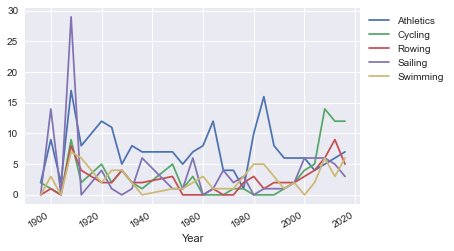

In [217]:
#plot medal total over time
final_table_columns = top_sports(5)

table = pd.pivot_table(gbr_sport, values='Medal_Total', index=['Year'],
                    columns=['Sport'], aggfunc=np.sum, fill_value=0)

table.drop(columns=[col for col in table if col not in final_table_columns], inplace=True)

table.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
#plt.rcParams["figure.figsize"] = [8, 5]
plt.show();

### Question 3: How well have women been represented in Team GB vs other countries?

In [452]:
#create athlete table to show key info by competitor 

athlete_table = pd.pivot_table(events[(events['Medal_Gold']+(events['Medal_Silver'])+(events['Medal_Bronze'])>=1)], 
                       index=['Name', 'NOC', 'Sex', 'Sport'], 
                       values=['Age', 'Year', 'Medal_Gold', 'Medal_Silver', 'Medal_Bronze'], 
                       aggfunc={'Age':np.min,'Year':np.min, 'Medal_Gold':np.sum, 'Medal_Silver':np.sum, 'Medal_Bronze':np.sum}
                      ).reset_index().rename(columns={"Age": "min_age", 'Medal_Gold': 'total_gold_medals', 'Medal_Silver': 'total_silver_medals', 'Medal_Bronze': 'total_bronze_medals'})

athlete_table['Medal_Total'] = athlete_table.loc[:,['total_gold_medals','total_silver_medals','total_bronze_medals']].sum(axis=1)

In [453]:
athlete_table[(athlete_table["total_gold_medals"]>=2)&(athlete_table["NOC"]=='GBR')]

,Name,NOC,Sex,Sport,min_age,total_bronze_medals,total_gold_medals,total_silver_medals,Year,Medal_Total
362,Albert George Hill,GBR,M,Athletics,31.0,0,2,1,1920-01-01,3
806,"Alexander John ""Alex"" Gregory",GBR,M,Rowing,28.0,0,2,0,2012-01-01,2
944,Alfred Ernest Tysoe,GBR,M,Athletics,26.0,0,2,0,1900-01-01,2
1014,Algernon Maudslay,GBR,M,Sailing,27.0,0,2,0,1900-01-01,2
1064,Alistair Edward Brownlee,GBR,M,Triathlon,24.0,0,2,0,2012-01-01,2
...,...,...,...,...,...,...,...,...,...,...
25035,"Thomas Watkin ""Tom"" James",GBR,M,Rowing,24.0,0,2,0,2008-01-01,2
26005,"Victoria Louise ""Vicki"" Pendleton (-Gardner)",GBR,F,Cycling,27.0,0,2,1,2008-01-01,3
26269,Vivian John Woodward,GBR,M,Football,28.0,0,2,0,1908-01-01,2
26984,William Edgar Exshaw,GBR,M,Sailing,34.0,0,2,0,1900-01-01,2


In [245]:
#top 5 Team GB female olympians of all time
f_athlete_table = athlete_table[(athlete_table["Sex"]=='F')&(athlete_table["NOC"]=='GBR')].nlargest(5, "Medal_Total")
f_athlete_table.sort_values(by="Medal_Total", ascending=False, inplace=True)
f_athlete_table

,Name,NOC,Sex,Sport,min_age,total_bronze_medals,total_gold_medals,total_silver_medals,Year,Medal_Total
14296,Katherine Jane Grainger,GBR,F,Rowing,24.0,0,1,4,2000-01-01,5
14309,"Kathleen ""Kitty"" McKane (-Godfree)",GBR,F,Tennis,23.0,2,1,2,1920-01-01,5
4167,Charlotte Susan Jane Dujardin,GBR,F,Equestrianism,27.0,0,3,1,2012-01-01,4
15415,Laura Rebecca Trott (-Kenny),GBR,F,Cycling,20.0,0,4,0,2012-01-01,4
17026,Margaret Joyce Cooper (-Badcock),GBR,F,Swimming,19.0,3,0,1,1928-01-01,4


In [155]:
#top 5 Team GB male olympians of all time
athlete_table[(athlete_table["Sex"]=='M')&(athlete_table["NOC"]=='GBR')].nlargest(5, "Medal_Total")

,Name,NOC,Sex,Sport,min_age,total_bronze_medals,total_gold_medals,total_silver_medals,Year,Medal_Total
3270,Bradley Marc Wiggins,GBR,M,Cycling,20.0,2,5,1,2000-01-01,8
4451,"Christopher Andrew ""Chris"" Hoy",GBR,M,Cycling,24.0,0,6,1,2000-01-01,7
12007,Jason Francis Kenny,GBR,M,Cycling,20.0,0,6,1,2008-01-01,7
24048,"Stephen Geoffrey ""Steven"" Redgrave",GBR,M,Rowing,22.0,1,5,0,1984-01-01,6
3986,"Charles Benedict ""Ben"" Ainslie",GBR,M,Sailing,19.0,0,4,1,1996-01-01,5


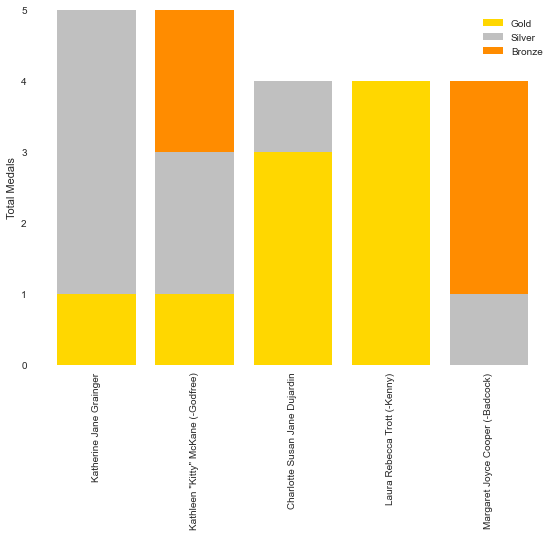

In [259]:
#plot top 5 female athletes of all time

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [2, 2]
plt.style.use('seaborn')

ax.b1 = plt.bar(f_athlete_table['Name'], f_athlete_table['total_gold_medals'], color="gold", label="Gold")
ax.b2 = plt.bar(f_athlete_table['Name'], f_athlete_table['total_silver_medals'], bottom=f_athlete_table['total_gold_medals'], color="silver",  label="Silver")
ax.b3 = plt.bar(f_athlete_table['Name'], f_athlete_table['total_bronze_medals'], bottom=f_athlete_table['total_gold_medals']+f_athlete_table['total_silver_medals'], color="darkorange",  label="Bronze")

ax.set_facecolor("#FFFFFF") 
plt.title("Top 5 Female Team GB Athletes", fontsize=15)
plt.tight_layout()
plt.ylabel("Total Medals")
plt.xticks(rotation=90, ha='center')
plt.legend(loc='best')
plt.show()

In [454]:
#rank to account for team events
events['athlete_rank'] = events.sort_values(['Event'], \
             ascending=[True])\
             .groupby(['City_Year', 'Name'])\
             .cumcount() + 1

In [455]:
#Re-encode medal column.
events=pd.get_dummies(data=events,columns=['Sex'])

In [456]:
athlete_df = (pd.pivot_table(events[(events["Season"]=="Summer") & (events["athlete_rank"]==1) ],index=['NOC', 'Year', 'City_Year'],values=['Sex_F', 'Sex_M'],aggfunc={'Sex_F': np.sum, 'Sex_M': np.sum}))
athlete_df.reset_index(inplace=True)
athlete_df.sort_values('Year')

,NOC,Year,City_Year,Sex_F,Sex_M
154,AUT,1896-01-01,Athina 1896,0.0,3.0
667,DEN,1896-01-01,Athina 1896,0.0,3.0
976,GER,1896-01-01,Athina 1896,0.0,19.0
2364,SUI,1896-01-01,Athina 1896,0.0,3.0
1010,GRE,1896-01-01,Athina 1896,0.0,102.0
...,...,...,...,...,...
1708,MKD,2016-01-01,Rio de Janeiro 2016,4.0,2.0
1702,MHL,2016-01-01,Rio de Janeiro 2016,3.0,2.0
1699,MGL,2016-01-01,Rio de Janeiro 2016,17.0,26.0
1994,PAN,2016-01-01,Rio de Janeiro 2016,6.0,4.0


In [464]:
#add row total and % of male / female athletes
athlete_df['Athelete_Total'] = athlete_df.loc[:,['Sex_F','Sex_M']].sum(axis=1)

athlete_df['Sex_F%'] = (athlete_df['Sex_F']/athlete_df['Athelete_Total']*100).round(0)
athlete_df['Sex_M%'] = (athlete_df['Sex_M']/athlete_df['Athelete_Total']*100).round(0)

athlete_df[(athlete_df['Year']=='2016-01-01')].describe()

,Sex_F,Sex_M,Athelete_Total,Sex_F%,Sex_M%
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,24.304348,29.676329,53.980676,41.463768,58.536232
std,47.002573,49.184975,94.782068,16.268004,16.268004
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,6.000000,33.000000,50.000000
50%,5.000000,7.000000,11.000000,42.000000,58.000000
75%,22.000000,33.000000,55.500000,50.000000,67.000000
max,291.000000,264.000000,555.000000,100.000000,100.000000


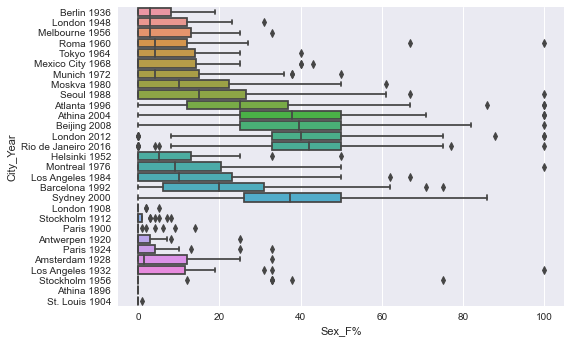

In [368]:
#box plot average female representation by games
sns.boxplot(x=athlete_df['Sex_F%'], y=athlete_df['City_Year'])

In [485]:
avg_f_rep = athlete_df.groupby(['Year'])["Sex_F%"].mean()

In [486]:
#create pivot table
f_rep = pd.pivot_table(athlete_df, values='Sex_F%', index=['Year'],
                    columns=['NOC'], aggfunc=np.mean, fill_value=0)

In [489]:
NOCS=["USA", "GBR", "FRA", "CHN", "JPN"]
f_rep.drop(columns=[col for col in f_rep if col not in NOCS], inplace=True)
f_rep

NOC,CHN,FRA,GBR,JPN,USA
Year,,,,,
1896-01-01,0,0.0,0,0.0,0.0
1900-01-01,0,2.0,1,0.0,9.0
1904-01-01,0,0.0,0,0.0,1.0
1908-01-01,0,0.0,5,0.0,0.0
1912-01-01,0,1.0,4,0.0,0.0
1920-01-01,0,3.0,7,0.0,5.0
1924-01-01,0,8.0,10,0.0,8.0
1928-01-01,0,14.0,13,2.0,16.0
1932-01-01,0,6.0,16,11.0,16.0


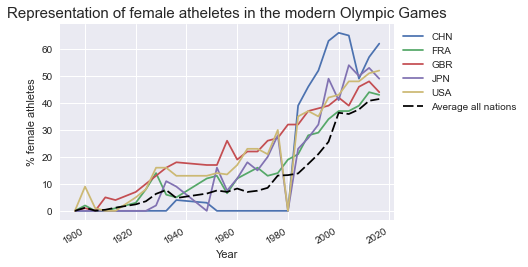

In [496]:
#plot representation of female athletes by team (top teams from Rio 2016) and games 
f_rep.plot()
plt.plot(avg_f_rep, color='black', dashes=[6, 2], label = "Average all nations")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.ylabel("% female athletes")
plt.title("Representation of female atheletes in the modern Olympic Games",  fontsize = 15)
plt.show();